<center>
    <h1>Geospatial Data Science Tutorial for IC2S2'23: OpenStreetMap</h1>
</center>

<p style="text-align:center;">
<img src="files/osm_logo.jpeg" alt="OSM logo" width=200px>
</p>

This notebook will give you a general, but brief, introduction to what OpenStreetmap is, what the OpenStreetMap data model looks like, and how OpenStreetMap data can be accessed.

The notebook was adapted from:

* OSMnx examples: https://github.com/gboeing/osmnx-examples

*All data in this notebook: © OpenStreetMap contributors*

## Getting to know OpenStreetMap

[OpenStreetMap](https://www.openstreetmap.org) (OSM) is an open data and mapping platform with global coverage 🌍. Some people compare it to Google Maps, but unlike Google Maps, OSM is open-source and allows you to edit, download and access all data for free.

OSM was established in 2004 by Steve Coast, and is an example of what we call Volunteered geographical information (VGI). This means that the backbone of OSM is the contributions of volunteer contributors. So far, more than [10 million people](https://wiki.openstreetmap.org/wiki/Contributors) have contributed to OSM.

OSM is both an immensely important resource for research using data on the built environment, but is also used by [many companies](https://welcome.openstreetmap.org/about-osm-community/consumers/). 

OSM is an open mapping platform, and you will therefore encounter local variations in mapping practices and varying data quality, depending on the location (like many other data set), but research has time and time again shown that OSM data generally is of a high quality and comparable to official data sets. (TODO: ADD REFERENCES)

<p style="text-align:center;">
<img src="files/completeness.png" alt="Map showing the completeness of OSM data on a global scale" width=600px>
</p>

<p style="text-align:right;">
<i>Global OSM road data completeness <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180698">(Barrington-Leigh & Millard-Ball 2019)</a></i></p>


In our research group, we use OSM data for many of our research projects:

* [Growing urban bicycle networks](https://www.nature.com/articles/s41598-022-10783-y)

* [Automated Detection of Missing Links in Bicycle Networks](https://onlinelibrary.wiley.com/doi/10.1111/gean.12324)

* [BikeDNA: Bicycle Infrastructure Data & Network Assessment](https://github.com/anerv/BikeDNA)

<p style="text-align:center;">
<img src="files/research_illu.png" alt="Illustrations of research projects" width=500px>
</p>



## OSM data model

All OSM data consist of 3 key elements, which are used to map all types of objects:

* *Nodes*
* *Ways*
* *Relations*

Example of OSM data model: Streets are mapped using **ways** (lines) and **nodes** (points) at intersections. Polygons are mapped using **closed ways** and more complex objects are mapped using **relations** which connect multiple ways and nodes.

<p style="text-align:center;">
<img src="files/nodes-and-ways.svg" alt="Illustration of OSM data model" width=400px>
</p>

<p style="text-align:right;">
<i><a href="https://alga.win.tue.nl/tutorials/openstreetmap/">Illustration from TU Eindhoven</a></i></p>

To add further information about objects, OSM uses **tags**. The many different tags can take a while to get used to, but this is a great resource: https://wiki.openstreetmap.org/wiki/Map_features

For street networks, a tag could for example be `highway:residential` for a residential street, or `highway:cycleway` for a bike lane.

## Accessing OSM data

There are many ways to access OSM data, but today, we will focus on how to download OSM data using the Python library [**OSMnx**](https://osmnx.readthedocs.io/en/stable/) from Geoff Boeing.

When we use OSMnx to download OSM data, all geometries are converted into [Shapely geometries](https://shapely.readthedocs.io/en/stable/geometry.html) as either Points, LineStrings or Polygons.

To use OSMnx we need to define which area we want to download data for. There are many ways of doing this, such as providing a bounding box, a polygon defining the area, an address, a place name, etc. Below we will see a few different examples for getting data on **administrative areas, building footprints, points of interest**, and **street networks**.


> **NOTE**
>
> OSMnx is great for smaller areas - to process OSM data in Python for areas we recommend using [Pyrosm](https://pyrosm.readthedocs.io/en/latest/index.html) by Henrikki Tenkanen.
>
>To download data for larger areas directly, use for example [Geofabrik](http://download.geofabrik.de/) or [BBBike](https://download.bbbike.org/osm/).
>

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as cx

### Place boundaries

OSM contain a large number of place boundaries. To download e.g. the place boundary for a municipality or city, we can use `geocode_to_gdf()`. The function uses the geocoder [Nominatim](https://nominatim.org/) to search the OSM data, so the search string must match the names in OSM/Nominatim.

You can check the correct search string like this: https://nominatim.openstreetmap.org/ui/search.html?q=Copenhagen+municipality


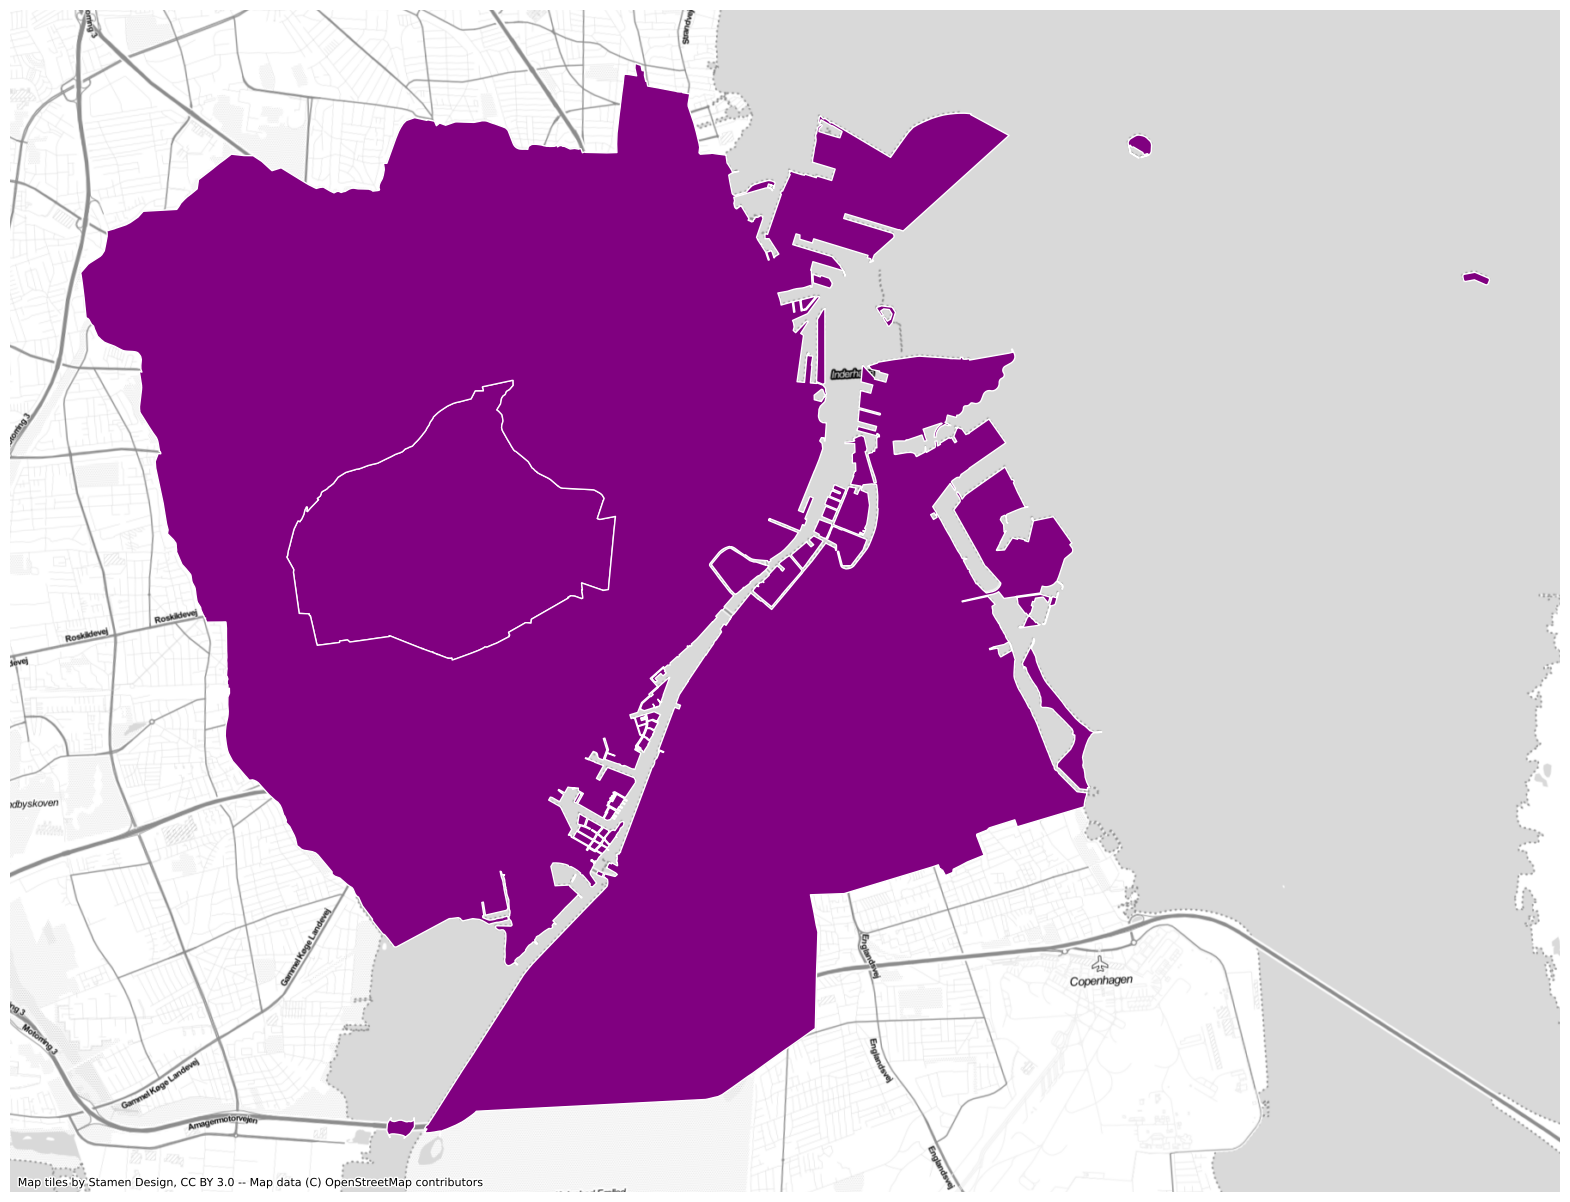

In [13]:
# get boundary polygons for several areas, project to local CRS, and plot
place_names = [
    "Frederiksberg Municipality",
    "Copenhagen Municipality",
]
cph = ox.geocode_to_gdf(place_names) # get place boundaries
cph = ox.project_gdf(cph,"EPSG:25832") # project to local crs
ax = cph.plot(fc="purple", ec="white",figsize=(15,15))
ax.axis("off")
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.Stamen.TonerLite);


### Building footprints

OSM is, in most places, a great resource for data on the built environment. 

To download data on buildings we use `geometries_from_place()` with the search query `"building":True` and plot them with `plot_footprints()`.

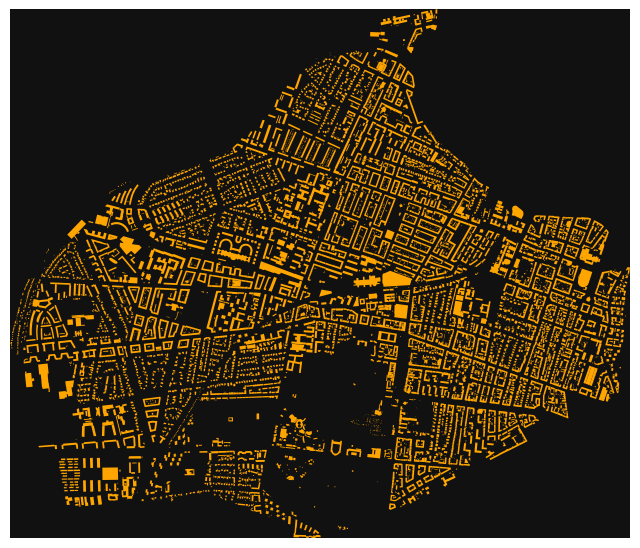

In [14]:
gdf = ox.geometries_from_place("Frederiksberg Municipality", tags = {"building": True}) # get all osm geometries with the tag 'building':True
gdf_proj = ox.project_gdf(gdf, to_crs="EPSG:25832") # project to local crs
fig, ax = ox.plot_footprints(gdf_proj, dpi=400, save=False, show=True, close=True)

### Points of interest

OSM contain a large number of destinations, amenities and other types of 'points of interests' (POIs), which - mostly - are mapped as point geometries. To get a specific type of POI in e.g. Copenhagen, we can use `geometries_from_place()` combined with a tag dictionary, which is used to query the OSM data with.

In the example below we download all shops which have been tagged as 'bakery' in Copenhagen.

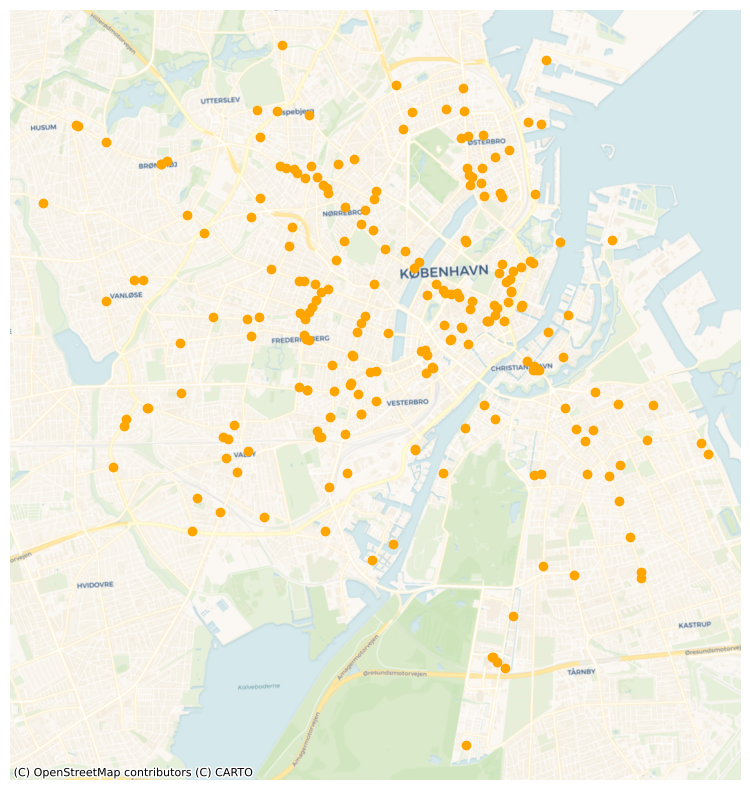

In [17]:
tags = {"shop": "bakery"} # define tags used to query OSM
bakeries = ox.geometries_from_place(["Copenhagen Municipality", "Frederiksberg Municipality"], tags) # download objects that matches query within specific location

fig, ax = plt.subplots(figsize=(10,10))

bakeries.to_crs("EPSG:25832").plot(ax=ax, color='orange') # plot to local crs
ax.set_axis_off()
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.CartoDB.Voyager);

### Street networks

ADD explanation - will talk more about spatial networks in last part of tutorial

In [ ]:
# same point again, but create network only of nodes within 750m along the network from point
G1 = ox.graph_from_point(location_point, dist=750, dist_type="network")
ox.plot_graph(G1, node_color="r");

# TODO: change plotting
# find location point for conference venue


In [ ]:
# create network only of nodes within 750m walking along the network from point
G2 = ox.graph_from_point(location_point, dist=750, dist_type="network", network_type="walk")
ox.plot_graph(G2, node_color="r");

In [ ]:
# network from address, including only nodes within 1km along the network from the address
G = ox.graph_from_address(
    address="7 Rued Langgaards Vej, Copenhagen",
    dist=1000,
    dist_type="network",
    network_type="bike",
)

# you can project the network to UTM (zone calculated automatically)
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected, node_color="r");


In [ ]:
# TODO: add plot showing network tags


In [16]:
# TODO: add something on custom filtering

### DIY

Try downloading OSM data for your home city. You could for example find the street network around your work place, plot all the [schools](https://wiki.openstreetmap.org/wiki/Tag:amenity%3Dschool) or the [rail network](https://wiki.openstreetmap.org/wiki/Key:railway), or have a look at some of the [many other examples](https://github.com/gboeing/osmnx-examples/tree/main/notebooks)

## Further resources

Would you like to learn more about working with and contributing to OSM?

* [Become an OSM contributor yourself!](https://wiki.openstreetmap.org/wiki/How_to_contribute)
* [Check out the OSM wiki](https://wiki.openstreetmap.org/wiki/Main_Page)

* Listen to this [podcast on the OSM history & community](https://mapscaping.com/podcast/openstreetmap-is-a-community-of-communities/)

* Check out some of these projects using OSM data:
    * [A/B Street](https://play.abstreet.org/0.3.44/abstreet.html)
    * [Propensity to Cycle Tool](https://www.pct.bike/)
    * [AccessMap](https://www.accessmap.io/?region=wa.seattle&lon=-122.338&lat=47.607&z=14.5)
    * [prettymaps](https://github.com/marceloprates/prettymaps)
    
<br>

* ...or have a look at some of the many research projects based on OSM:

    * [A Multi-Scale Analysis of 27,000 Urban Street Networks: Every US City, Town, Urbanized Area, and Zillow Neighborhood (Boeing 2020)](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=xaKBPQQAAAAJ&citation_for_view=xaKBPQQAAAAJ:Wp0gIr-vW9MC)
    * [GrowBike (Szell et al 2022)](https://growbike.net/)
    * [Fixbike (Vybornova et al 2022)](https://fixbike.net/)
